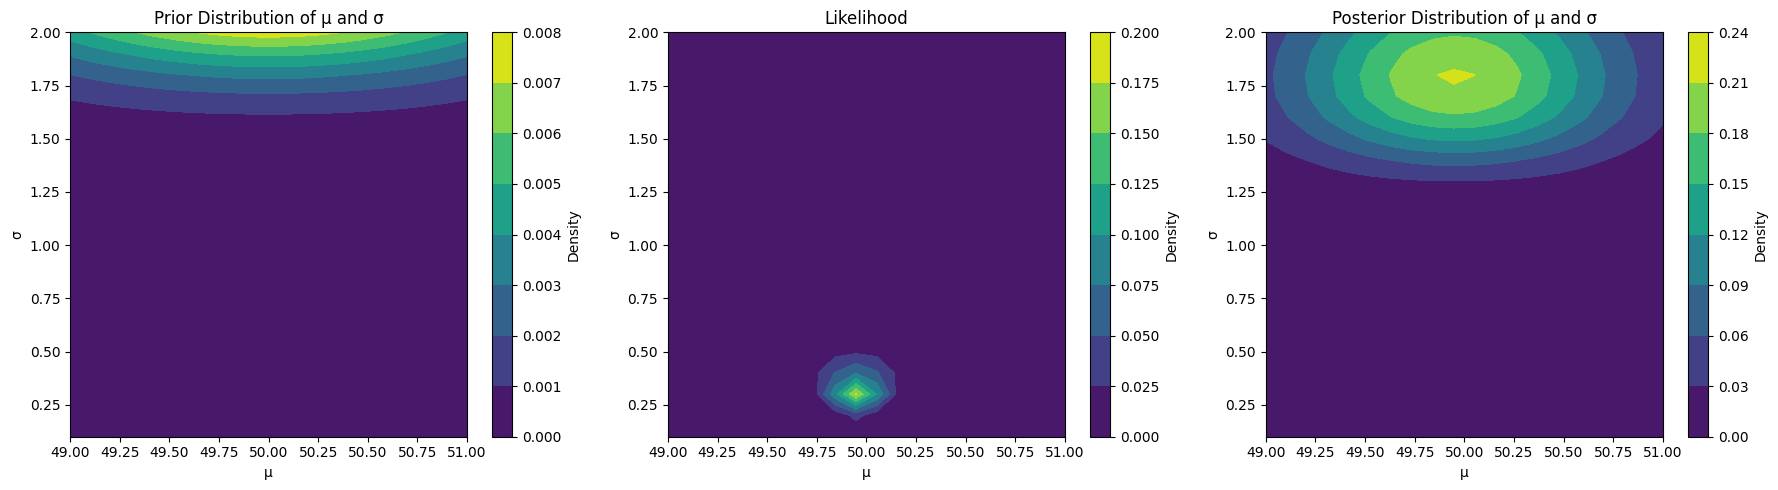

事後分布の平均 μ_n: 49.95454545454545
事後分布の標準偏差 σ_n: 0.5744973677065639


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, invgamma

def run_simulation3():
    # データ
    d = np.array([49.5, 50.2, 49.8, 50.1, 49.7, 50.0, 49.9, 50.3, 49.6, 50.4])
    n = len(d)
    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)

    # 事前分布のパラメータ
    mu_0 = 50.0  # 事前分布の平均
    lambda_0 = 1.0  # 事前分布の精度
    alpha_0 = 2.0  # 事前分布の形状パラメータ
    beta_0 = 25.0  # 事前分布の尺度パラメータ（σ_0^2 = 5^2 = 25）

    # 事後分布のパラメータ
    lambda_n = lambda_0 + n
    mu_n = (lambda_0 * mu_0 + n * mean_d) / lambda_n
    alpha_n = alpha_0 + n / 2
    beta_n = beta_0 + 0.5 * (np.sum((d - mean_d) ** 2) + lambda_0 * n * (mean_d - mu_0) ** 2 / lambda_n)

    # μとσの離散値
    mu_values = np.linspace(49.0, 51.0, 20)
    sigma_values = np.linspace(0.1, 2.0, 20)

    # 事前分布の計算
    prior = np.zeros((len(mu_values), len(sigma_values)))
    for i, mu in enumerate(mu_values):
        for j, sigma in enumerate(sigma_values):
            prior[i, j] = norm.pdf(mu, mu_0, 1/np.sqrt(lambda_0)) * invgamma.pdf(sigma ** 2, alpha_0, scale=beta_0)

    # 尤度の計算
    likelihood = np.zeros((len(mu_values), len(sigma_values)))
    for i, mu in enumerate(mu_values):
        for j, sigma in enumerate(sigma_values):
            likelihood[i, j] = np.prod(norm.pdf(d, mu, sigma))

    # 事後分布の計算
    posterior = np.zeros((len(mu_values), len(sigma_values)))
    for i, mu in enumerate(mu_values):
        for j, sigma in enumerate(sigma_values):
            posterior[i, j] = norm.pdf(mu, mu_n, np.sqrt(beta_n / (alpha_n * lambda_n))) * invgamma.pdf(sigma ** 2, alpha_n, scale=beta_n)

    # ヒートマップのプロット
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.contourf(mu_values, sigma_values, prior.T, cmap='viridis')
    plt.colorbar(label='Density')
    plt.xlabel('μ')
    plt.ylabel('σ')
    plt.title('Prior Distribution of μ and σ')

    plt.subplot(1, 3, 2)
    plt.contourf(mu_values, sigma_values, likelihood.T, cmap='viridis')
    plt.colorbar(label='Density')
    plt.xlabel('μ')
    plt.ylabel('σ')
    plt.title('Likelihood')

    plt.subplot(1, 3, 3)
    plt.contourf(mu_values, sigma_values, posterior.T, cmap='viridis')
    plt.colorbar(label='Density')
    plt.xlabel('μ')
    plt.ylabel('σ')
    plt.title('Posterior Distribution of μ and σ')

    plt.tight_layout()
    plt.show()

    print(f"事後分布の平均 μ_n: {mu_n}")
    print(f"事後分布の標準偏差 σ_n: {np.sqrt(beta_n / (alpha_n * lambda_n))}")

run_simulation3()


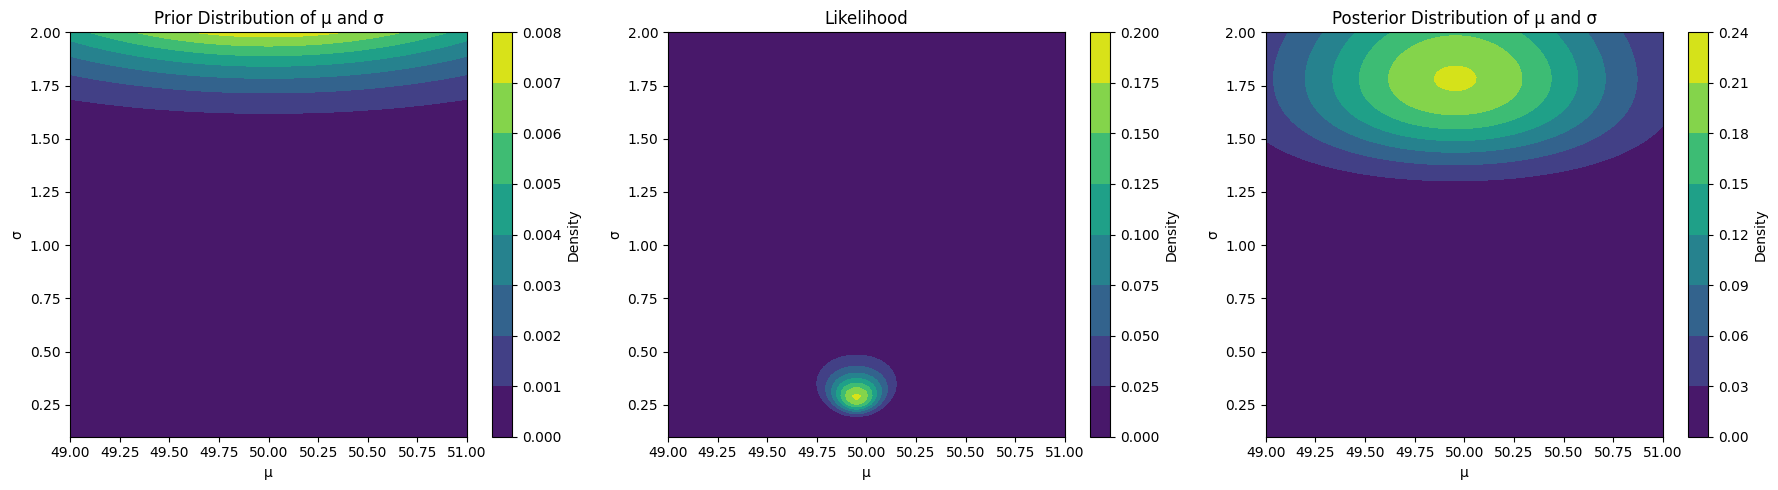

事後分布の平均 μ_n: 49.95454545454545
事後分布の標準偏差 σ_n: 0.5744973677065639


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, invgamma

def run_simulation3():
    # データ
    d = np.array([49.5, 50.2, 49.8, 50.1, 49.7, 50.0, 49.9, 50.3, 49.6, 50.4])
    n = len(d)
    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)

    # 事前分布のパラメータ
    mu_0 = 50.0  # 事前分布の平均
    lambda_0 = 1.0  # 事前分布の精度
    alpha_0 = 2.0  # 事前分布の形状パラメータ
    beta_0 = 25.0  # 事前分布の尺度パラメータ（σ_0^2 = 5^2 = 25）

    # 事後分布のパラメータ
    lambda_n = lambda_0 + n
    mu_n = (lambda_0 * mu_0 + n * mean_d) / lambda_n
    alpha_n = alpha_0 + n / 2
    beta_n = beta_0 + 0.5 * (np.sum((d - mean_d) ** 2) + lambda_0 * n * (mean_d - mu_0) ** 2 / lambda_n)

    # μとσの範囲
    mu_range = np.linspace(49.0, 51.0, 100)
    sigma_range = np.linspace(0.1, 2.0, 100)

    # 事前分布の計算
    prior = np.zeros((len(mu_range), len(sigma_range)))
    for i, mu in enumerate(mu_range):
        for j, sigma in enumerate(sigma_range):
            prior[i, j] = norm.pdf(mu, mu_0, 1/np.sqrt(lambda_0)) * invgamma.pdf(sigma ** 2, alpha_0, scale=beta_0)

    # 尤度の計算
    likelihood = np.zeros((len(mu_range), len(sigma_range)))
    for i, mu in enumerate(mu_range):
        for j, sigma in enumerate(sigma_range):
            likelihood[i, j] = np.prod(norm.pdf(d, mu, sigma))

    # 事後分布の計算
    posterior = np.zeros((len(mu_range), len(sigma_range)))
    for i, mu in enumerate(mu_range):
        for j, sigma in enumerate(sigma_range):
            posterior[i, j] = norm.pdf(mu, mu_n, np.sqrt(beta_n / (alpha_n * lambda_n))) * invgamma.pdf(sigma ** 2, alpha_n, scale=beta_n)

    # ヒートマップのプロット
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.contourf(mu_range, sigma_range, prior.T, cmap='viridis')
    plt.colorbar(label='Density')
    plt.xlabel('μ')
    plt.ylabel('σ')
    plt.title('Prior Distribution of μ and σ')

    plt.subplot(1, 3, 2)
    plt.contourf(mu_range, sigma_range, likelihood.T, cmap='viridis')
    plt.colorbar(label='Density')
    plt.xlabel('μ')
    plt.ylabel('σ')
    plt.title('Likelihood')

    plt.subplot(1, 3, 3)
    plt.contourf(mu_range, sigma_range, posterior.T, cmap='viridis')
    plt.colorbar(label='Density')
    plt.xlabel('μ')
    plt.ylabel('σ')
    plt.title('Posterior Distribution of μ and σ')

    plt.tight_layout()
    plt.show()

    print(f"事後分布の平均 μ_n: {mu_n}")
    print(f"事後分布の標準偏差 σ_n: {np.sqrt(beta_n / (alpha_n * lambda_n))}")

run_simulation3()
